In [3]:
import os
import pandas as pd
#import scanpy as sc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import anndata
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from natsort import natsorted, index_natsorted, order_by_index,natsort_keygen
import matplotlib.colors
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.transforms as transforms
import statsmodels.api as sm
import create_dataset
%matplotlib inline

In [3]:
path_data = "../data/"
savedir = "../output/"
path_samples = path_data + "single_events_data/"
metadata = pd.read_csv(path_data + "Metadata.csv")
measures = pd.read_excel(path_data + "phenotypes.xlsx")
retrain=False

In [14]:
### load syntof
df, markers = create_dataset.createDataset(metadata, path_samples)
print(len(df))

3575717


In [ ]:

map_id2sta = {ii:dt for ii,dt in list(zip(measures["ID"].astype(str).values,
                                            measures["Status"].values))}
df["Status"] = df["Sample_num"].astype(str).map(map_id2sta).values

In [16]:
df["Sample_num"] = df["Subject_name"]

In [17]:
# Load data model representation
main_path = path_data + 'mcResultsDWH' + '.csv' 
df_aec = pd.read_csv(main_path)
print(df_aec.shape)
print(df_aec.mc.unique())
df['aec'] = df_aec['mc'].values
df_hidden = pd.read_csv(path_data + "hidden_ae_syntof_monkey_sess_1.csv")
col_hidden = ["hidden_0_%s"%str(k) for k in range(15)]
df[col_hidden] = df_hidden[col_hidden].values
df

(3575717, 2)
[13 15 11  1 14  3  6  4  8  5  2 12 10  9  7]


/var/folders/yn/qvpxfrdd5870gxhq9hf9jvc40000gq/T/ipykernel_46213/650301046.py:7: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_hidden = pd.read_csv(path_data + "hidden_ae_syntof_monkey_sess_1.csv")


,Event #,89Y_EAAT1_(Y89Di),113In_VMAT2_(In113Di),115In_Synaptobrevin2_(In115Di),141Pr_LRRK2_(Pr141Di),142Nd_a-Synuclein_(Nd142Di),143Nd_GFAP_(Nd143Di),144Nd_PARKIN_(Nd144Di),146Nd_Casp3_Acti_(Nd146Di),147Sm_BIN1_(Sm147Di),...,hidden_0_5,hidden_0_6,hidden_0_7,hidden_0_8,hidden_0_9,hidden_0_10,hidden_0_11,hidden_0_12,hidden_0_13,hidden_0_14
0,1,0.039773,0.000000,0.000000,0.373926,0.286259,0.000000,0.000000,0.000000,0.498515,...,-2.191464,-1.249975,1.005508,-0.349183,0.451492,-1.565527,1.144591,1.290149,-0.184100,-1.419017
1,2,0.170145,0.024200,0.192687,0.655436,1.091951,0.000000,0.098567,0.183583,2.007977,...,1.849417,2.468455,0.636649,-0.093134,2.715817,3.103783,-2.571755,-1.897987,2.549372,-0.449223
2,3,0.000000,0.447064,0.000000,0.000000,0.494881,1.360826,0.000000,0.419558,0.276471,...,-1.539719,-2.206340,0.507747,-1.055282,-2.089678,-1.510891,1.608406,2.707591,-2.067071,-0.788330
3,4,0.111267,0.213933,0.000000,0.634774,0.714131,0.251863,0.000000,0.386929,0.639893,...,0.205032,-0.013086,-2.768643,1.695410,-2.004517,-1.182565,0.484066,2.770609,0.852135,0.650856
4,5,0.104487,0.017022,0.000000,0.055894,0.659700,0.000000,0.000000,0.000000,0.561837,...,2.814841,2.737688,-3.007503,1.234016,-0.174318,1.265682,-2.994693,1.360949,1.557955,1.577027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51600,51601,0.682555,0.319722,0.435118,0.058370,0.258708,0.092320,0.000000,0.000000,0.239759,...,0.130670,-0.080294,-2.663739,1.689311,-1.736785,-1.480651,0.406441,2.714360,0.720234,0.478205
51601,51602,0.000000,0.000000,0.019848,0.521240,0.278492,0.000000,0.000000,0.133769,0.244967,...,-1.295430,-1.983011,0.170507,-1.091177,-2.037864,-1.530327,1.648429,2.757098,-1.834925,-0.769523
51602,51603,0.000000,0.000000,0.139854,0.000000,0.459078,0.000000,0.000000,0.000000,0.259407,...,-1.524698,-2.141694,0.321935,-1.080712,-2.097245,-1.645078,1.659924,2.730683,-1.977034,-0.643433
51603,51604,0.000000,0.086325,0.486212,0.333002,0.706389,0.146496,0.134527,0.629155,0.000000,...,-0.368244,-0.549597,-1.362748,0.877644,-1.071863,-1.340776,0.674523,2.403329,0.178286,-0.083009


In [18]:
df = df[df.Diet.isin(["mediterranean", "western"])]
df

,Event #,89Y_EAAT1_(Y89Di),113In_VMAT2_(In113Di),115In_Synaptobrevin2_(In115Di),141Pr_LRRK2_(Pr141Di),142Nd_a-Synuclein_(Nd142Di),143Nd_GFAP_(Nd143Di),144Nd_PARKIN_(Nd144Di),146Nd_Casp3_Acti_(Nd146Di),147Sm_BIN1_(Sm147Di),...,hidden_0_5,hidden_0_6,hidden_0_7,hidden_0_8,hidden_0_9,hidden_0_10,hidden_0_11,hidden_0_12,hidden_0_13,hidden_0_14
0,1,0.039773,0.000000,0.000000,0.373926,0.286259,0.000000,0.000000,0.000000,0.498515,...,-2.191464,-1.249975,1.005508,-0.349183,0.451492,-1.565527,1.144591,1.290149,-0.184100,-1.419017
1,2,0.170145,0.024200,0.192687,0.655436,1.091951,0.000000,0.098567,0.183583,2.007977,...,1.849417,2.468455,0.636649,-0.093134,2.715817,3.103783,-2.571755,-1.897987,2.549372,-0.449223
2,3,0.000000,0.447064,0.000000,0.000000,0.494881,1.360826,0.000000,0.419558,0.276471,...,-1.539719,-2.206340,0.507747,-1.055282,-2.089678,-1.510891,1.608406,2.707591,-2.067071,-0.788330
3,4,0.111267,0.213933,0.000000,0.634774,0.714131,0.251863,0.000000,0.386929,0.639893,...,0.205032,-0.013086,-2.768643,1.695410,-2.004517,-1.182565,0.484066,2.770609,0.852135,0.650856
4,5,0.104487,0.017022,0.000000,0.055894,0.659700,0.000000,0.000000,0.000000,0.561837,...,2.814841,2.737688,-3.007503,1.234016,-0.174318,1.265682,-2.994693,1.360949,1.557955,1.577027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110810,110811,0.022039,0.000000,0.000000,0.158191,0.000000,0.000000,0.256040,0.000000,0.532458,...,-2.246669,-1.541011,0.980528,-0.491000,-0.046376,-1.823853,1.345325,1.756900,-0.735917,-1.351968
110811,110812,0.000000,0.000000,0.374104,0.072327,0.567982,0.098218,0.000000,0.389909,0.044564,...,0.188810,-0.038947,-2.752798,1.723688,-1.906567,-1.245335,0.357214,2.695980,0.821687,0.651767
110812,110813,0.000000,0.351804,0.000000,0.939424,0.120826,0.000000,0.020166,0.000000,0.475286,...,-2.060332,-1.437302,0.714912,-0.312646,0.162387,-1.642262,1.060191,1.755495,-0.140962,-0.909559
110813,110814,0.049684,0.000000,0.000000,0.444357,0.000000,0.172707,0.000000,0.671365,0.382181,...,-1.587927,-1.974384,0.245375,-1.024033,-1.936986,-1.789967,1.239214,2.442002,-2.009860,-0.675246


In [19]:
import scipy.stats as stats
hue = "Diet"

groups_by = [hue, 'Sample_num']
cluster_method = 'aec'
print(df[cluster_method].unique())
gf_kmeans = df.groupby(groups_by + [cluster_method]).agg({"Sample_num":"count"})
gf_kmeans.rename(columns={'Sample_num':'events_clusters_subjects'}, inplace=True)
gf_samples = df.groupby(groups_by).agg({'Sample_num':'count'})   
gf_samples.rename(columns={'Sample_num':'events_samples'}, inplace=True)
multi_sample = gf_kmeans.reset_index(cluster_method)
multi_sample['events_samples'] = gf_samples['events_samples']
multi_sample['freq'] = multi_sample['events_clusters_subjects'].div(multi_sample['events_samples'])
mm = multi_sample.reset_index()


[13 15 11  1 14  3  6  4  8  5  2 12 10  9  7]


[13 15 11  1 14  3  6  4  8  5  2 12 10  9  7]
[((13, 'mediterranean'), (13, 'western')), ((15, 'mediterranean'), (15, 'western')), ((11, 'mediterranean'), (11, 'western')), ((1, 'mediterranean'), (1, 'western')), ((14, 'mediterranean'), (14, 'western')), ((3, 'mediterranean'), (3, 'western')), ((6, 'mediterranean'), (6, 'western')), ((4, 'mediterranean'), (4, 'western')), ((8, 'mediterranean'), (8, 'western')), ((5, 'mediterranean'), (5, 'western')), ((2, 'mediterranean'), (2, 'western')), ((12, 'mediterranean'), (12, 'western')), ((10, 'mediterranean'), (10, 'western')), ((9, 'mediterranean'), (9, 'western')), ((7, 'mediterranean'), (7, 'western'))]
              Diet Sample_num  aec  events_clusters_subjects  events_samples  \
0    mediterranean       8359    1                     18824          100524   
1    mediterranean       8359    2                       574          100524   
2    mediterranean       8359    3                      3714          100524   
3    mediterranean  

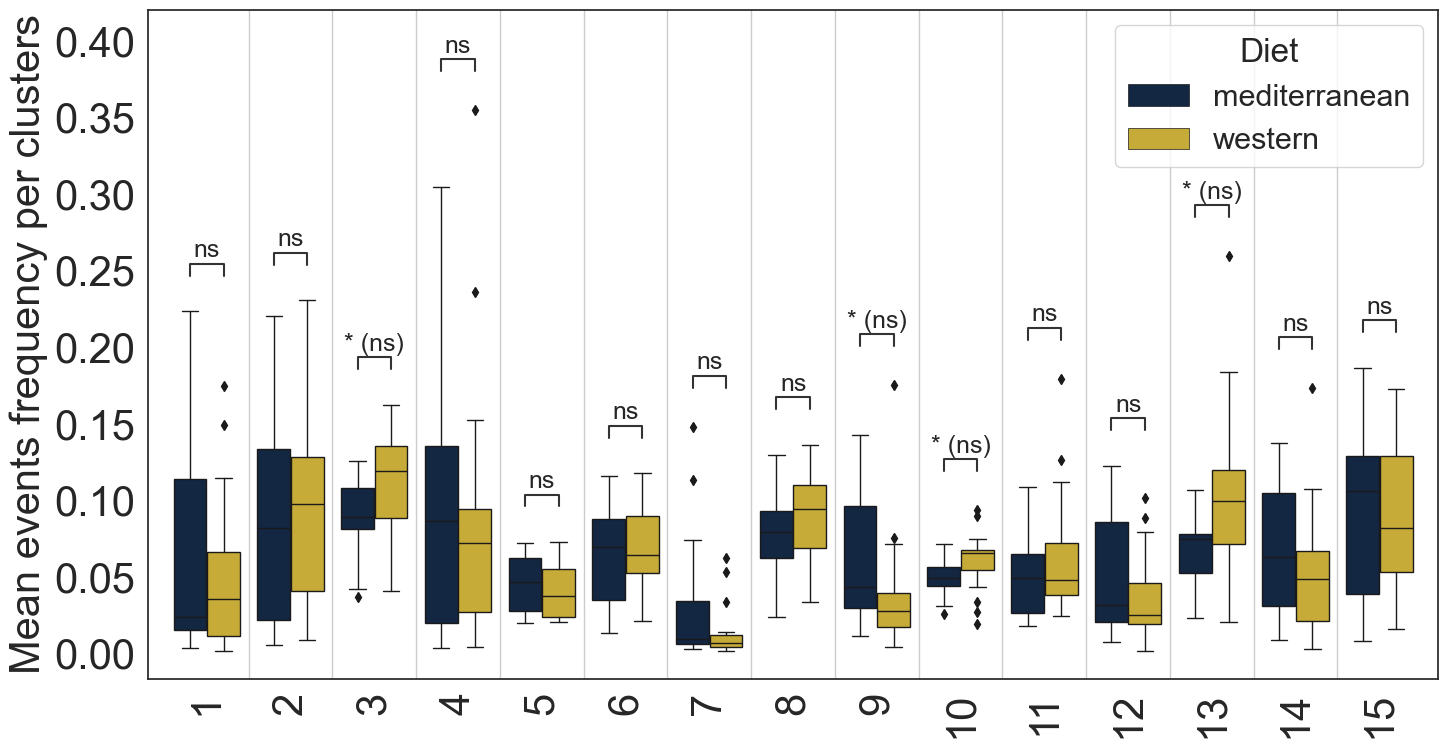

In [22]:
from statannotations.Annotator import Annotator

color_map= {"mediterranean":"#0b244a", "western":"#dfb920", "Subordinate":"#444054", "Dominant":"#B3C0A4"}
#df.replace(mapping, inplace=True)
#mm.loc[:,"aec"].replace(mapping, inplace=True)

#clusters = mapping.keys() #
clusters = df.aec.unique()
print(clusters)
if hue =="Diet":
    box_pair = [((cl, "mediterranean"), (cl,"western")) for cl in clusters ]
elif hue=="Status":
    box_pair = [((cl, "Dominant"), (cl,"Subordinate")) for cl in clusters ]

print(box_pair)

fig, ax = plt.subplots(figsize=(15,8))
sns.set(font_scale=2)
sns.set_style("white")
print(mm)
sns.boxplot(ax=ax, x='aec', y='freq', hue=hue, data=mm, palette=color_map, #order=order, 
            linewidth=1 )
annotator = Annotator(ax, box_pair, data=mm, x='aec', y='freq', #order=order,
                      hue=hue)
annotator.configure(test='Mann-Whitney',  text_format="star", loc='inside', fontsize="18", comparisons_correction="BH")#, correction_format="replace")#,correction_format="replace")
annotator.apply_and_annotate()
if False:
    test_results = add_stat_annotation(ax=ax, data=mm, x='aec', y='freq', hue=hue,
                                      box_pairs=box_pair, test='Mann-Whitney', #num_comparisons=11,
                                      #order=order,
                                       fontsize="18")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
ax.set_ylabel("Mean events frequency per clusters", fontsize=30)
ax.set_xlabel("")
#ax.legend("")
ax.yaxis.grid(False) # Hide the horizontal gridlines
ax.set_xticks([x-0.5 for x in range(1,len(clusters))],minor=True )
ax.xaxis.grid(True,which="minor") # Show the vertical gridlinesgridlines
plt.tight_layout()
#ax.set_xticklabels([mapping[int(t.get_text())]  for t in ax.get_xticklabels()])
plt.savefig(savedir+ "Figure2A.svg")
plt.show()
#plt.close("all")
#plt.clf()

In [ ]:
save_dir

0         13
1         15
2         11
3          1
4         14
          ..
110810    11
110811     1
110812    13
110813    11
110814    11
Name: aec, Length: 3321410, dtype: int64


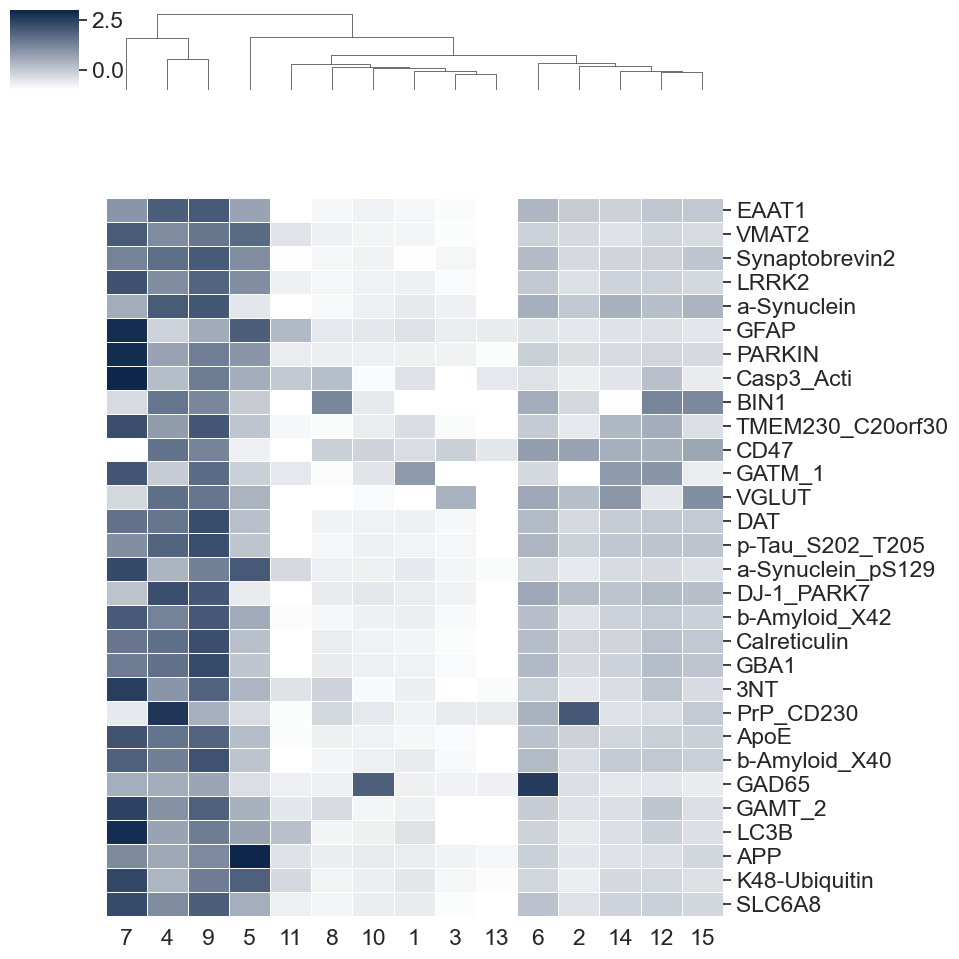

In [26]:
####scaled mean expression values per row (per clusters) THE GOOD ONE

scaler = StandardScaler()
#mapping={14:"A1", 11:"A2", 6:"B1", 2:"B2", 10:"B3", 3:"B4", 16:"B5", 7:"C1", 
#        4:"C2", 9:"C3", 8:"C4", 5:"C5", 1:"C6", 15:"C7",12:"C8",13:"C9"}
cluster_method = "aec"
#df.replace(mapping, inplace=True)

sns.set(font_scale=1.5, style="white")
list_feat_all = markers #list_feat_surface + list_feat_activity

#fig, axes = plt.subplots(figsize=(10, 10))  
norm=plt.Normalize(-2,2)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ffffff", "#0b244a"])
print(df.aec)
df_ = df[list_feat_all + [cluster_method, 'Sample_num']]
df_g = df_.groupby([cluster_method, 'Sample_num']).mean()
mm_ = df_g.reset_index()
mm_ = mm_.groupby([cluster_method])[list_feat_all].mean().reset_index()
mm_[list_feat_all] = scaler.fit_transform(mm_[list_feat_all])
mm_ = mm_.groupby([cluster_method]).mean().reset_index().sort_values(["aec"], key=natsort_keygen())
nb_clusters = df_[cluster_method].nunique()


#post_ind = [8, 7, 11, 5, 9, 2, 6, 0, 12, 10, 13, 1, 14, 3, 4]
#yticks = [k+1 for k in post_ind]
#print(yticks)
newy = [it.split("_(")[0].split("_",1)[1] for it in list_feat_all]
sns.clustermap(mm_[list_feat_all].T,
                     # ax=axes,
                    cmap=cmap,
                    row_cluster=False,
                            xticklabels=mm_.aec,
                            yticklabels=newy,
            linewidth=0.4,
                            #row_cluster=False,
                            dendrogram_ratio=0.1,
                             #z_score=0,
                              vmin=-1, vmax=3,
           #                 cbar_kws={"orientation": "vertical"},
          # cbar_ax = fig.add_axes([0.98, .7, .03, .2]))
                     #cbar_pos=(0.02, .9, .25, .02))
                     )

#g.ax_heatmap.set_xticklabels(yticks)
#g.set_title(sp)
#set_aspect("equal")
#plt.xlabel('Clusters')
#plt.ylabel('Markers')
#plt.title('Mean Expression')

savepath = (savedir + 'Figure2E' + ".svg")
plt.tight_layout()
plt.savefig(savepath, bbox_inches="tight")
plt.show()

plt.close("all")

In [27]:
import matplotlib.patheffects as pe
from matplotlib.cm import ScalarMappable
from scipy.spatial import ConvexHull
def plot_fancy_scatter_clustering(sub_sample, 
                                  dico_color,
                    save_dir, savename="TSNE",
                    dico_offset_x=None,
                    dico_offset_y=None,
                    annot=True,
                    cluster_key="aec", method_name="tsne"):
    fig, axes = plt.subplots(figsize=(12, 10)) 

    for i, label in enumerate(sub_sample[cluster_key].unique()):
        dt = sub_sample[sub_sample[cluster_key]==label]
        tt = len(dt)
        if (dico_offset_x is not None) & (dico_offset_y is not None):
            ctr = [dt[method_name + "_0"].mean()+dico_offset_x[label], dt[method_name + "_1"].mean()+dico_offset_y[label]]
        else:
            ctr = [dt[method_name + "_0"].mean(), dt[method_name + "_1"].mean()]


        plt.scatter(x=dt[method_name + "_0"], y=dt[method_name + "_1"],
                                #hue="aec",
                                s=12,
                                c=dico_color[label],
                                alpha=0.3,
                                marker='.',
                                #legend=True
                                )

        
        if annot:
            plt.annotate(label, 
                         ctr,#enters[i,:],
                         #sub_sample.loc[sub_sample['aec']==label,[method_name + "_0",method_name + "_1"]].mean(),
                         horizontalalignment='center',
                         verticalalignment='center',
                         #size=15, #weight='bold',
                         fontsize=22,
                         fontfamily="fantasy",
                         fontstyle="oblique",
                         #path_effects=[pe.withStroke(linewidth=0.2, foreground="black")],
                         color= "black")#dico_color[label])
    plt.xticks([])
    plt.yticks([])
    plt.axis("off")
    plt.xlabel(method_name + ' 1')
    plt.ylabel(method_name + ' 2')
    savepath = (save_dir  + savename  + method_name + cluster_key + ".svg")
    plt.savefig(savepath)
    plt.show()
    print("save plot " + savepath)
    plt.clf()
    plt.close('all') 
def plot_scatter_marker_enrichment(sub_sample, list_feat_c,                 
                    save_dir, savename="TSNE",
                    nb_rows=2,
                    nb_cols=4,
                    figsize=(17, 9), 
                    cmap="tab10",
                    method_name="tsne"):

    fig, axes = plt.subplots(nb_rows, nb_cols, figsize=figsize, sharex=True, sharey=True) 
    if nb_cols+nb_rows>2:
        axes=axes.flatten()
    else:
        axes = [axes]
    for i, label in enumerate(list_feat_c):


        #color =[str(item/255.) for item in sub_sample[label]]
        #mx=np.max(np.log(sub_sample[label]+1))
        #mn=np.min(np.log(sub_sample[label] +1))

        sc = axes[i].scatter(x=sub_sample[method_name + "_0"], y=sub_sample[method_name + "_1"],
                                s=3,
                                #c=(np.log(sub_sample[label] +1)-mn)/(mx-mn),
                                c=sub_sample[label],
                                cmap=cmap,
                                alpha=0.5,
                                marker='.',
                                
                                )
        axes[i].set_title(label,fontsize=30)
        axes[i].axis("off")

    #norm = plt.Normalize(0, 1)
    #sm =  ScalarMappable(norm=norm, cmap=cmap)
    #sm.set_array([])
    plt.xticks([])
    plt.yticks([])
    #plt.colorbar()
    cax = plt.axes([0.95, 0.1, 0.075, 0.5])
    plt.colorbar(sc, cax=cax)
    fig.tight_layout()
    
    savepath = (save_dir + method_name + '_markers_level_cell' + savename + ".png")
    plt.savefig(savepath)
    plt.show()
    print("save plot " + savepath)
    plt.clf()
    plt.close('all')  

In [28]:
dico_color={"1":"#FFD20D", "2":"#BA7687",
                        "3":"#4FDE0B", "4":"#FFC9FB",#EED4B8
                         "5":"#D602F7", "6":"#F72902",
                         "7":"#F99339", 
                        "8":"#9077BB","9":"#FFD2AB",
                        "10":"#CDC9FF","11":"#F089C0",
             "12":"#00ABF5",#"#0F9168"
                        "13":"#00F5C8", "14":"#C9FFFB",
                        "15":"#86AEC4"}
n=50
from sklearn.manifold import TSNE

sub_sample = df.groupby(["Sample_num", "aec"]).sample(n, replace=False, random_state=1)
model_tsne = TSNE(n_jobs=30, perplexity=30, early_exaggeration=30)#n_neighbors=50, min_dist=0.01, random_state=1)
res= model_tsne.fit_transform(sub_sample[col_hidden].values)
method_name="tsne"
col_tsne = ["tsne_%d"%d for d in range(res.shape[1])]
sub_sample[col_tsne] = res


/var/folders/yn/qvpxfrdd5870gxhq9hf9jvc40000gq/T/ipykernel_46213/3102810089.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


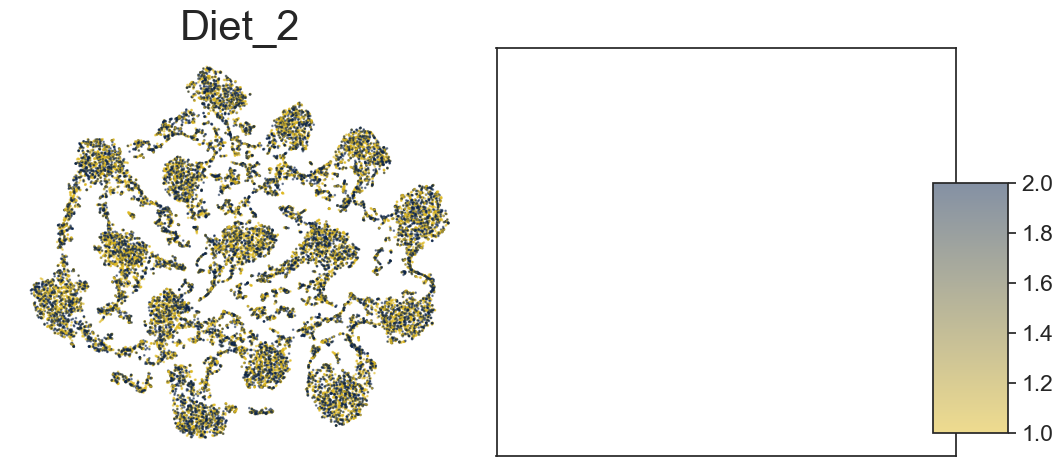

save plot ../output/tsne_markers_level_cellTSNE.png


In [30]:

#color_map= {"mediterranean":"#0b244a", "western":"#dfb920",
cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', ["#dfb920", "#0b244a"])

sub_sample
map_id2sta = {ii:dt for ii,dt in list(zip(measures["ID"].astype(str).values,
                                            measures["Status"].values))}
sub_sample["Social_Group"] = sub_sample["Sample_num"].astype(str).map(map_id2sta).values
sub_sample["Diet_2"] = sub_sample["Diet"].map({"mediterranean":2, "western":1}).values
plot_scatter_marker_enrichment(sub_sample, [ "Diet_2"],  #"Social_Group",               
                    savedir, savename="TSNE",
                    nb_rows=1,
                    nb_cols=2,
                    cmap=cmap,
                    figsize=(10, 5),       
                    method_name="tsne")

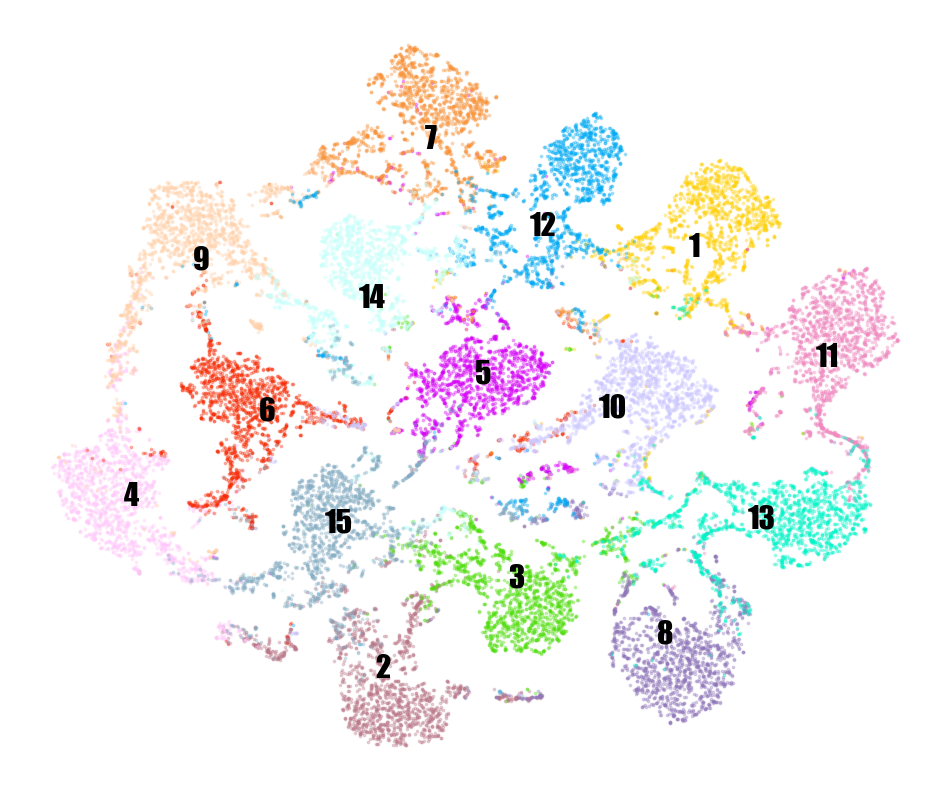

save plot ../output/Figure2Dtsneaec.svg


In [32]:
sub_sample["aec"] = sub_sample["aec"].astype(str)
plot_fancy_scatter_clustering(sub_sample, 
                                  dico_color,
                    savedir, savename="Figure2D",
                    dico_offset_x=None,
                    dico_offset_y=None,
                    annot=True,
                    cluster_key="aec", method_name="tsne")

In [33]:

def ttest_per_cluster_per_marker(df, list_feat_all,label="Diet", key_down="mediterranean", key_up="western"):
    df_med = df[df[label]==key_down]
    df_wes = df[df[label]==key_up]
    df_p_value = pd.DataFrame(columns=["aec",
                                       "marker", 'pvalue', "log2_mean_ratio","log10_mean_ratio",
                                       ])
    
    nb_test=0
    for cl in df["aec"].unique():

        for marker in list_feat_all:
            x = df_med[ (df_med["aec"] == cl)]

            y = df_wes[(df_wes["aec"] == cl)]
                            #effect = np.median(y[marker]) /np.median(x[marker])
            if np.mean(x[marker]) < 1e-9:
                if np.mean(y[marker])>1e-9: 
                        print(np.mean(y[marker]))

            effect = np.log2(np.mean(y[marker]) /np.mean(x[marker]))
            log10_fc = np.log10(np.mean(y[marker]) /np.mean(x[marker]))
            re = stats.ttest_ind(x[marker], y[marker], alternative="two-sided")
            df_p_value.loc[nb_test] =[cl, marker, re[1], effect,  log10_fc]
            nb_test +=1

    df_p_value.dropna(subset = ["pvalue"], inplace=True)
    df_p_value["bonferonni_corr"] = df_p_value.pvalue.values * nb_test
    q_value = sm.stats.fdrcorrection(df_p_value.pvalue.values, alpha=0.05,
                                                        method='indep', is_sorted=False)
    df_p_value["q_value"] = q_value[1]
    df_p_value["-log10(q_value)"] = -np.log10(q_value[1])
    return df_p_value


In [34]:
def create_signature_matrix(df, list_feat_all, cluster_method = 'aec', key="Diet"):
    df_ = df[list_feat_all + [cluster_method, key, 'Sample_num' ]]
    df_m_k_s = df_.groupby([cluster_method, key, 'Sample_num']).median()
    sig_mm = df_m_k_s.reset_index()
    #sig_mm = sig_mm_.pivot(index='Sample_num', columns=['Brain_area', 'aec'], values=list_feat_all)
    #sig_mm.columns = sig_mm.columns.to_flat_index()
    return sig_mm
sig_mm = create_signature_matrix(df, list_feat_all, key="Diet" )
df_p_value = ttest_per_cluster_per_marker(sig_mm, list_feat_all)#,label="Status", key_down="Subordinate", key_up="Dominant")
df_p_value

/var/folders/yn/qvpxfrdd5870gxhq9hf9jvc40000gq/T/ipykernel_46213/534600743.py:22: RuntimeWarning: invalid value encountered in scalar divide
  effect = np.log2(np.mean(y[marker]) /np.mean(x[marker]))
/var/folders/yn/qvpxfrdd5870gxhq9hf9jvc40000gq/T/ipykernel_46213/534600743.py:23: RuntimeWarning: invalid value encountered in scalar divide
  log10_fc = np.log10(np.mean(y[marker]) /np.mean(x[marker]))
/var/folders/yn/qvpxfrdd5870gxhq9hf9jvc40000gq/T/ipykernel_46213/534600743.py:22: RuntimeWarning: invalid value encountered in scalar divide
  effect = np.log2(np.mean(y[marker]) /np.mean(x[marker]))
/var/folders/yn/qvpxfrdd5870gxhq9hf9jvc40000gq/T/ipykernel_46213/534600743.py:23: RuntimeWarning: invalid value encountered in scalar divide
  log10_fc = np.log10(np.mean(y[marker]) /np.mean(x[marker]))
/var/folders/yn/qvpxfrdd5870gxhq9hf9jvc40000gq/T/ipykernel_46213/534600743.py:22: RuntimeWarning: invalid value encountered in scalar divide
  effect = np.log2(np.mean(y[marker]) /np.mean(x[mark

0.0015294693141910739
0.00019819790194991317
0.0006494331620553369
0.0017950027933057737
0.0009077200145919895
0.005232032269844577
0.005830868352334173
8.137133470141051e-05
0.005746005062573521
0.0002999036372048
0.0002550863722739053
0.0030610700884532577


/var/folders/yn/qvpxfrdd5870gxhq9hf9jvc40000gq/T/ipykernel_46213/534600743.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  effect = np.log2(np.mean(y[marker]) /np.mean(x[marker]))
/var/folders/yn/qvpxfrdd5870gxhq9hf9jvc40000gq/T/ipykernel_46213/534600743.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  log10_fc = np.log10(np.mean(y[marker]) /np.mean(x[marker]))
/var/folders/yn/qvpxfrdd5870gxhq9hf9jvc40000gq/T/ipykernel_46213/534600743.py:22: RuntimeWarning: invalid value encountered in scalar divide
  effect = np.log2(np.mean(y[marker]) /np.mean(x[marker]))
/var/folders/yn/qvpxfrdd5870gxhq9hf9jvc40000gq/T/ipykernel_46213/534600743.py:23: RuntimeWarning: invalid value encountered in scalar divide
  log10_fc = np.log10(np.mean(y[marker]) /np.mean(x[marker]))
/var/folders/yn/qvpxfrdd5870gxhq9hf9jvc40000gq/T/ipykernel_46213/534600743.py:22: RuntimeWarning: invalid value encountered in scalar divide
  effect = np.log2(np.mean(y[marker]) /np.mean(x[ma

,aec,marker,pvalue,log2_mean_ratio,log10_mean_ratio,bonferonni_corr,q_value,-log10(q_value)
0,1,89Y_EAAT1_(Y89Di),0.015840,2.264642,0.681725,7.128045,0.411843,0.385269
1,1,113In_VMAT2_(In113Di),0.519818,0.381874,0.114956,233.918136,0.846829,0.072205
2,1,115In_Synaptobrevin2_(In115Di),0.328212,2.007442,0.604300,147.695578,0.790106,0.102314
3,1,141Pr_LRRK2_(Pr141Di),0.954877,-0.017909,-0.005391,429.694791,0.993072,0.003019
4,1,142Nd_a-Synuclein_(Nd142Di),0.031910,-0.169755,-0.051101,14.359577,0.528500,0.276955
...,...,...,...,...,...,...,...,...
443,15,168Er_b-Amyloid_X40_(Er168Di),0.643086,-0.186336,-0.056093,289.388771,0.880108,0.055464
444,15,169Tm_GAD65_(Tm169Di),0.058261,0.096287,0.028985,26.217422,0.624834,0.204236
446,15,171Yb_LC3B_(Yb171Di),0.836264,-0.017689,-0.005325,376.318919,0.977193,0.010020
447,15,173Yb_APP_(Yb173Di),0.917605,-0.010221,-0.003077,412.922220,0.978207,0.009569


In [ ]:
def qval_plot(df_,
                    dir_path, 
                     savename="ttest_test",
                    title="Mediterreanean vs Western",
                     y="log2_mean_ratio",
              yy="aec",
                 x="-log10(q_value)",
                    clusters=[str(k) for k in range(1,11)],
                    ylim = -np.log10(0.05),
                    xlim = 0.25,
                     side_down="mediterranean",
                     side_up="western"
                    ):
    sns.set(font_scale=2, style="white")
    color_map= {"mediterranean":"#0b244a", "western":"#dfb920", "Subordinate":"#444054", "Dominant":"#B3C0A4"}
    fig, ax = plt.subplots(figsize=(7, 10), sharey=False, sharex=True)
    jj=df_
    jj[yy] = jj[yy].astype(int)
    jj = jj.sort_values(yy,ascending=False)
    jj[yy] = jj[yy].astype("str")
    jj_s1 = jj[((jj[y]>=xlim) & (jj[x] >=ylim)) ]
    sns.scatterplot(data=jj_s1, y=yy, x=x, s=16, color=color_map[side_up], ax=ax)
    jj_s2 = jj[((jj[y]<=-xlim) & (jj[x] >=ylim)) ]
    
    sns.scatterplot(data=jj_s2, y=yy, x=x, s=16,color=color_map[side_down], ax=ax)
    jj_ns = jj[(jj[x] <ylim)|((jj[y]<xlim) &(jj[y]>-xlim))]
    g =sns.scatterplot(ax=ax, data=jj_ns, y=yy, x=x, color="grey", s=8)
    
    ax.axvline(x=ylim, color= 'k', linestyle='--', linewidth=0.8)
    for i in range(jj_s1.shape[0]):
            ax.text(x=jj_s1.iloc[i][x],y=jj_s1.iloc[i][yy],s=jj_s1.iloc[i]["marker"].split("_(")[0].split("_",1)[1], fontdict=dict(color=color_map[side_up],size=22), )
    for i in range(jj_s2.shape[0]):
            ax.text(x=jj_s2.iloc[i][x],y=jj_s2.iloc[i][yy],s=jj_s2.iloc[i]["marker"].split("_(")[0].split("_",1)[1], fontdict=dict(color=color_map[side_down],size=22), )
    if g.axes.legend_:
            g.axes.legend_.remove()
    #ax.set_xscale("log")
    print(ax.get_yticklabels())
    plt.suptitle(title + " " + savename, fontsize=22)
    plt.savefig(dir_path + savename + "Qplot_"+x+"_marker_std.svg", bbox_inches='tight')
    plt.show()
    plt.close("all")
    plt.clf()

In [35]:
def volcano_plot(df_,
                    dir_path, 
                     savename="ttest_test",
                    title="Mediterreanean vs Western",
                     x="log2_mean_ratio",
                 y="-log10(q_value)",
                    clusters=[str(k) for k in range(1,11)],
                    xlim = -np.log10(0.05),
                    ylim = 0.1,
                     side_down="mediterranean",
                     side_up="western"
                    ):
    
    color_map= {"mediterranean":"#0b244a", "western":"#dfb920", "Subordinate":"#444054", "Dominant":"#B3C0A4"}

    
    fig, ax = plt.subplots(figsize=(7, 7), sharey=False, sharex=True)

    #for i, ba in enumerate(df_.Brain_area.unique()):
    i=0
    if True:
        jj = df_

        jj.reset_index(inplace=True)
        jj['aec'] = jj['aec'].astype(str).values
        sns.set(font_scale=1)
        sns.set_style("whitegrid", {'axes.grid' : False})
        jj_s1 = jj[((jj[y]>xlim) & (jj[x] >ylim)) ]
        g =sns.scatterplot(ax=ax, data=jj_s1, y=y, x=x,color=color_map[side_down], s=10)
        jj_s2 = jj[((jj[y]>xlim) & (jj[x] <-ylim)) ]
        g =sns.scatterplot(ax=ax, data=jj_s2, y=y, x=x, color=color_map[side_up], s=10)

        jj_ns = jj[(jj[y]<xlim) |((jj[x] <ylim) & (jj[x] >-ylim))]
        g =sns.scatterplot(ax=ax, data=jj_ns, y=y, x=x, color="grey", s=12)
        ax.set_xlim(-0.5, 0.5)

        # if i==3:
        #         h,l = g.axes.get_legend_handles_labels()
        #         g.axes.legend_.remove()
        #         g.legend(h,l, bbox_to_anchor=(1.18, 1),
        #                borderaxespad=0, ncol=1)
        # else:
        #         h,l = g.axes.get_legend_handles_labels()
        #         g.axes.legend_.remove()
        #         g.legend(h,l, bbox_to_anchor=(1.18, 1),
        #                borderaxespad=0, ncol=1)
        ax.axhline(y=xlim, color= 'k', linestyle='--', linewidth=0.8)
        ax.axvline(x=-ylim, color= 'k', linestyle='--', linewidth=0.8)
        ax.axvline(x=ylim, color= 'k', linestyle='--', linewidth=0.8)
        for i in range(jj_s1.shape[0]):
            ax.text(x=jj_s1.iloc[i][x],y=jj_s1.iloc[i][y],s=jj_s1.iloc[i]["marker"].split("_(")[0].split("_",1)[1], fontdict=dict(color=color_map[side_up],size=10), )
        for i in range(jj_s2.shape[0]):
            ax.text(x=jj_s2.iloc[i][x],y=jj_s2.iloc[i][y],s=jj_s2.iloc[i]["marker"].split("_(")[0].split("_",1)[1], fontdict=dict(color=color_map[side_down],size=10), )
        #ax.title.set_text(ba)
        ax.title.set_fontsize(22)
        ax.text(-0.4, 2, "+ " + side_down, alpha=0.3)
        ax.tick_params(labelsize=22)
        ax.xaxis.label.set_size(22)
        ax.yaxis.label.set_size(22)
        ax.text(0.4,2, "+ " + side_up, alpha=0.3)
        if g.axes.legend_:
            g.axes.legend_.remove()

    plt.subplots_adjust(wspace=0.5)
    plt.suptitle(title + " " + savename, fontsize=22)
    plt.savefig(dir_path + savename + "volcano_"+x+"_marker_std.png", bbox_inches='tight')
    plt.show()
    plt.close("all")
    plt.clf()

In [38]:
# for it in df_p_value.aec.unique():
#     volcano_plot(df_p_value[df_p_value.aec==it],dir_path=savedir, savename=str(it))#, side_up="Dominant", side_down="Subordinate", title="Status Sub vs Dom")

In [39]:
# for it in df_p_value.aec.unique():
#     volcano_plot(df_p_value[df_p_value.aec==it],dir_path=save_dir, savename=str(it))
# qval_plot(df_p_value, dir_path=savedir, savename="Status", )

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mediterranean_mediterranean vs. western_western: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.210e-04 U_stat=5.300e+01
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mediterranean_mediterranean vs. western_western: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.608e-02 U_stat=1.030e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mediterranean_mediterranean vs. western_western: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg corr

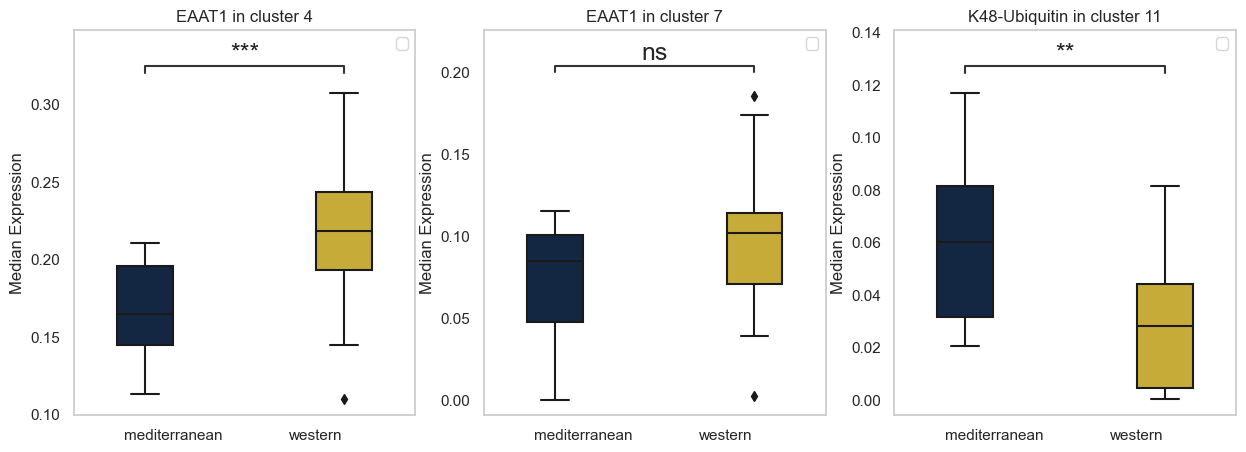

In [41]:
color_map= {"mediterranean":"#0b244a", "western":"#dfb920", "Subordinate":"#444054", "Dominant":"#B3C0A4"}
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax=ax.flatten()
pair = [(4, "89Y_EAAT1_(Y89Di)"), (7, "89Y_EAAT1_(Y89Di)"), (11, '174Yb_K48-Ubiquitin_(Yb174Di)')]
for ii, (cl, y) in enumerate(pair):
    sns.boxplot(data=sig_mm[sig_mm.aec==cl], x="Diet", y=y, palette=color_map, hue="Diet", ax=ax[ii])
    ax[ii].set_title(y.split("_(")[0].split("_", 1)[1] + " in cluster " + str(cl))
    ax[ii].legend("")
    ax[ii].set_xlabel("")
    ax[ii].set_ylabel("Median Expression")
    annotator = Annotator(ax[ii], [(("western","western"), ("mediterranean","mediterranean"))], data=sig_mm[sig_mm.aec==cl], x="Diet", y=y, #order=order,
                      hue="Diet")
    annotator.configure(test='Mann-Whitney',  text_format="star", loc='inside', fontsize="18", comparisons_correction="BH")#, correction_format="replace")#,correction_format="replace")
    annotator.apply_and_annotate()
plt.savefig(savedir  + "Supp Figure2B.svg", bbox_inches='tight')
plt.show()